ANOVA-Tabelle:
                       sum_sq     df         F    PR(>F)
C(Autor)            10.899209    1.0  5.389001  0.021750
C(Thema)            15.833333    3.0  2.609543  0.054084
C(Autor):C(Thema)    1.764190    3.0  0.290762  0.832014
Residual           275.058824  136.0       NaN       NaN


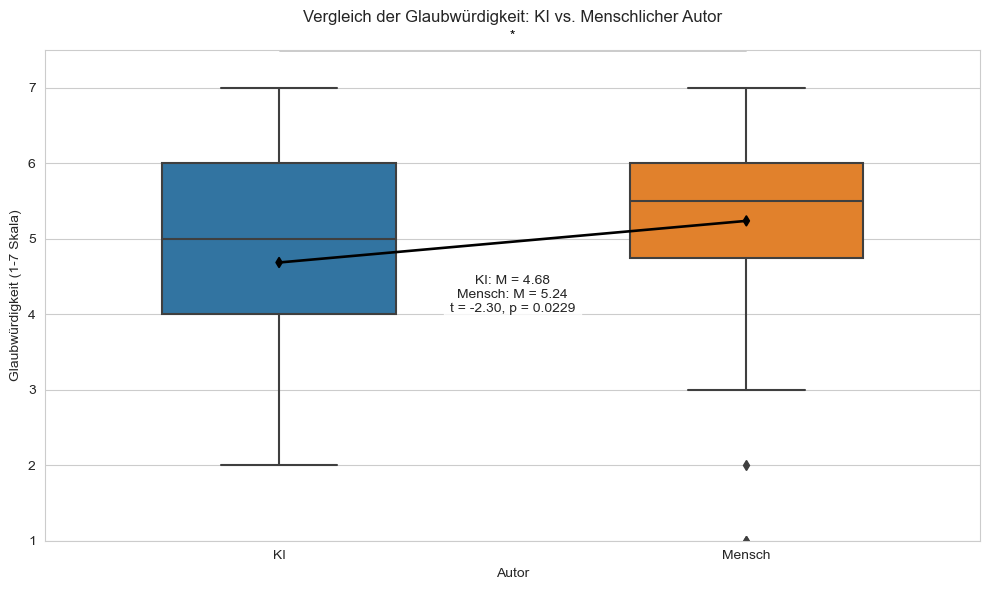

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# 2. Daten für Glaubwürdigkeit (Frage 2) umwandeln
melted_data = pd.melt(data, id_vars=['Autor'], 
                     value_vars=[
                         'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
                     ],
                     var_name='Thema',
                     value_name='Glaubwürdigkeit')

# 3. ANOVA durchführen
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Autor):C(Thema)', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA-Tabelle:")
print(anova_table)

# 4. Vergleichsdiagramm erstellen
plt.figure(figsize=(10, 6))

# Boxplot mit Signifikanzmarkierung
ax = sns.boxplot(x='Autor', y='Glaubwürdigkeit', data=melted_data, 
                 palette={'KI': '#1f77b4', 'Mensch': '#ff7f0e'},
                 width=0.5)

# Mittelwerte als Punkte einzeichnen
sns.pointplot(x='Autor', y='Glaubwürdigkeit', data=melted_data,
              color='black', markers='d', scale=0.7, 
              errorbar=None, estimator=np.mean)

# t-Test und Signifikanzmarkierung
ki_values = melted_data[melted_data['Autor'] == 'KI']['Glaubwürdigkeit']
human_values = melted_data[melted_data['Autor'] == 'Mensch']['Glaubwürdigkeit']
t_stat, p_val = stats.ttest_ind(ki_values, human_values)

# Signifikanzsterne hinzufügen
y_max = melted_data['Glaubwürdigkeit'].max() + 0.5
if p_val < 0.001:
    sig_symbol = '***'
elif p_val < 0.01:
    sig_symbol = '**'
elif p_val < 0.05:
    sig_symbol = '*'
else:
    sig_symbol = 'n.s.'

plt.plot([0, 1], [y_max, y_max], color='black', lw=1)
plt.text(0.5, y_max+0.1, sig_symbol, ha='center', va='bottom', color='black')

# Diagramm beschriften
plt.title('Vergleich der Glaubwürdigkeit: KI vs. Menschlicher Autor', pad=20)
plt.xlabel('Autor')
plt.ylabel('Glaubwürdigkeit (1-7 Skala)')
plt.ylim(1, 7.5)

# Deskriptive Statistiken anzeigen
ki_mean = np.mean(ki_values)
human_mean = np.mean(human_values)
plt.text(0.5, 0.5, 
         f"KI: M = {ki_mean:.2f}\nMensch: M = {human_mean:.2f}\nt = {t_stat:.2f}, p = {p_val:.4f}",
         ha='center', va='center', transform=ax.transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

Ergebnisse der t-Tests (KI vs. Mensch):
Geld: t = -1.01, p = 0.3179
Gesundheit: t = -0.70, p = 0.4876
Sport: t = -1.25, p = 0.2181
Wissen: t = -1.67, p = 0.1049

ANOVA-Ergebnisse:
KI-Autoren: F = 2.54, p = 0.0628
Mensch-Autoren: F = 0.49, p = 0.6923


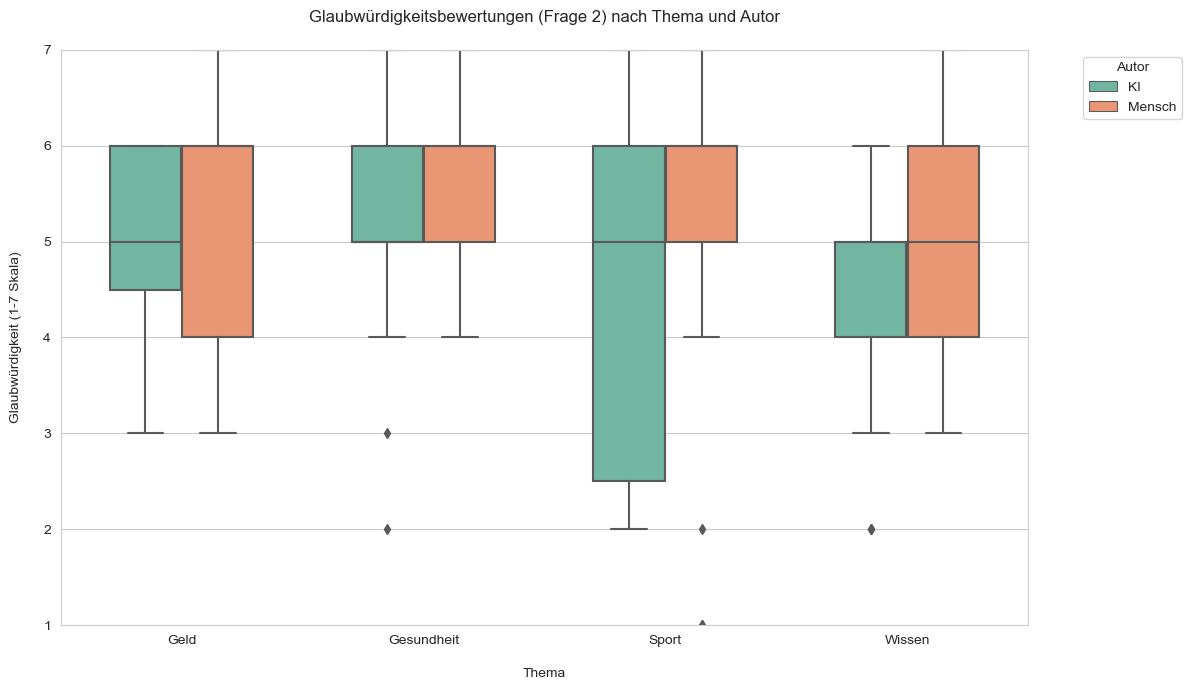

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Autor-Spalte hinzufügen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Daten zusammenführen
data = pd.concat([ai_data, human_data])

# Nur Frage 2 extrahieren
melted_data = pd.melt(data, id_vars=['Autor'], 
                     value_vars=[
                         'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
                         'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
                     ],
                     var_name='Frage', 
                     value_name='Glaubwürdigkeit')

# Thema extrahieren
melted_data['Thema'] = melted_data['Frage'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Boxplot erstellen
plt.figure(figsize=(12, 7))
sns.boxplot(x='Thema', y='Glaubwürdigkeit', hue='Autor', 
            data=melted_data, palette='Set2', width=0.6,
            order=['Geld', 'Gesundheit', 'Sport', 'Wissen'])
plt.title('Glaubwürdigkeitsbewertungen (Frage 2) nach Thema und Autor', pad=20)
plt.xlabel('Thema', labelpad=15)
plt.ylabel('Glaubwürdigkeit (1-7 Skala)', labelpad=15)
plt.ylim(1, 7)
plt.legend(title='Autor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Signifikanztests und Annotationen
def annotate_significance(x1, x2, y, p):
    if p < 0.001:
        symbol = '***'
    elif p < 0.01:
        symbol = '**'
    elif p < 0.05:
        symbol = '*'
    else:
        return
        
    plt.plot([x1, x1, x2, x2], [y, y+0.1, y+0.1, y], lw=1, color='black')
    plt.text((x1+x2)*0.5, y+0.15, symbol, ha='center', va='bottom', color='black')

# t-Tests für Autor-Vergleiche pro Thema
y_pos = 6.5
themen = ['Geld', 'Gesundheit', 'Sport', 'Wissen']
print("Ergebnisse der t-Tests (KI vs. Mensch):")
for i, thema in enumerate(themen):
    ki = melted_data[(melted_data['Autor'] == 'KI') & 
                    (melted_data['Thema'] == thema)]['Glaubwürdigkeit']
    mensch = melted_data[(melted_data['Autor'] == 'Mensch') & 
                        (melted_data['Thema'] == thema)]['Glaubwürdigkeit']
    
    # t-Test durchführen
    t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit')
    print(f"{thema}: t = {t_stat:.2f}, p = {p_val:.4f}")
    
    # Signifikanz markieren
    annotate_significance(i-0.2, i+0.2, y_pos, p_val)

# ANOVA für Themenunterschiede (getrennt nach Autor)
print("\nANOVA-Ergebnisse:")
for autor in ['KI', 'Mensch']:
    autor_data = melted_data[melted_data['Autor'] == autor]
    groups = [autor_data[autor_data['Thema'] == t]['Glaubwürdigkeit'] for t in themen]
    f_stat, p_val = stats.f_oneway(*groups)
    print(f"{autor}-Autoren: F = {f_stat:.2f}, p = {p_val:.4f}")

plt.tight_layout()
plt.show()

Durchschnittliche Bewertungen:
Geschlecht         männlich  weiblich
Autor  Thema                         
KI     Geld        4.833333  5.142857
       Gesundheit  5.000000  5.714286
       Sport       4.333333  4.142857
       Wissen      4.333333  4.142857
Mensch Geld        5.444444  5.250000
       Gesundheit  5.777778  5.250000
       Sport       5.222222  4.875000
       Wissen      5.000000  5.000000


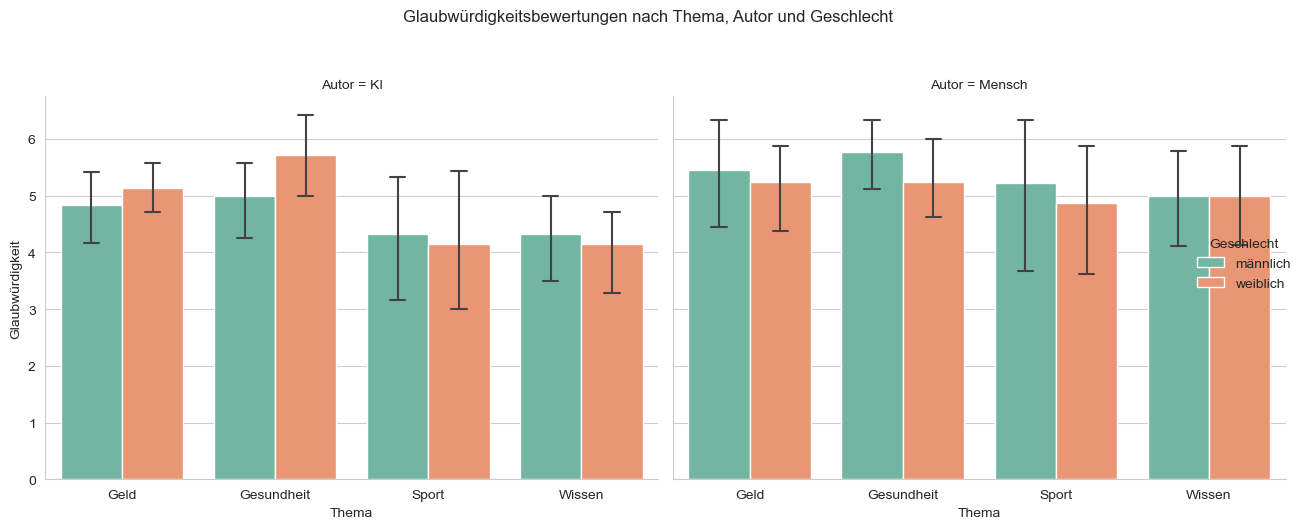


--- Statistische Auswertung ---

ANOVA-Tabelle:
                                     sum_sq     df         F    PR(>F)
C(Autor)                          10.978257    1.0  5.200494  0.024234
C(Thema)                          15.833333    3.0  2.500129  0.062449
C(Geschlecht)                      0.082223    1.0  0.038950  0.843861
C(Autor):C(Thema)                  1.976300    3.0  0.312063  0.816633
C(Autor):C(Geschlecht)             1.585532    1.0  0.751080  0.387756
C(Thema):C(Geschlecht)             0.750206    3.0  0.118460  0.949121
C(Autor):C(Thema):C(Geschlecht)    2.432529    3.0  0.384103  0.764630
Residual                         270.208333  128.0       NaN       NaN

Tukey HSD für Autor:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    KI Mensch   0.5511 0.0229 0.0774 1.0248   True
--------------------------------------------------

Geschlechterunterschiede (t-Tests

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 1. Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Autor-Spalte hinzufügen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# 2. Daten umwandeln
melted_data = pd.melt(data, 
                     id_vars=['Autor', 'Geben Sie ihr Geschlecht an.'], 
                     value_vars=[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?' 
                                for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']],
                     var_name='Thema',
                     value_name='Glaubwürdigkeit')

# Thema extrahieren
melted_data['Thema'] = melted_data['Thema'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Geschlecht bereinigen
melted_data['Geschlecht'] = melted_data['Geben Sie ihr Geschlecht an.'].str.strip().str.lower()
melted_data = melted_data[melted_data['Geschlecht'].isin(['männlich', 'weiblich'])]

# 3. Deskriptive Statistik
print("Durchschnittliche Bewertungen:")
print(melted_data.groupby(['Autor', 'Thema', 'Geschlecht'])['Glaubwürdigkeit'].mean().unstack())

# 4. Visualisierung mit Facetten
g = sns.catplot(
    x='Thema', 
    y='Glaubwürdigkeit', 
    hue='Geschlecht',
    col='Autor',
    data=melted_data,
    kind='bar',
    palette='Set2',
    errorbar=('ci', 95),  # 95% Konfidenzintervalle
    capsize=0.1,
    errwidth=1.5,
    height=5,
    aspect=1.2
)
g.fig.suptitle('Glaubwürdigkeitsbewertungen nach Thema, Autor und Geschlecht', y=1.05)
plt.tight_layout()
plt.show()

# 5. Statistische Tests
print("\n--- Statistische Auswertung ---")

# a) Dreifaktorielle ANOVA
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Geschlecht) + \
            C(Autor):C(Thema) + C(Autor):C(Geschlecht) + C(Thema):C(Geschlecht) + \
            C(Autor):C(Thema):C(Geschlecht)',
            data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nANOVA-Tabelle:")
print(anova_table)

# b) Post-hoc-Tests für signifikante Effekte
def run_tukey(data, group_col, value_col='Glaubwürdigkeit'):
    tukey = pairwise_tukeyhsd(
        endog=data[value_col],
        groups=data[group_col],
        alpha=0.05
    )
    print(f"\nTukey HSD für {group_col}:")
    print(tukey.summary())

# Für signifikante Haupteffekte (p < 0.05)
if anova_table['PR(>F)']['C(Autor)'] < 0.05:
    run_tukey(melted_data, 'Autor')

if anova_table['PR(>F)']['C(Thema)'] < 0.05:
    run_tukey(melted_data, 'Thema')

if anova_table['PR(>F)']['C(Geschlecht)'] < 0.05:
    run_tukey(melted_data, 'Geschlecht')

# c) Geschlechtervergleiche pro Autor-Thema-Kombination
print("\nGeschlechterunterschiede (t-Tests):")
for autor in ['KI', 'Mensch']:
    for thema in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        subset = melted_data[(melted_data['Autor'] == autor) & 
                           (melted_data['Thema'] == thema)]
        maennlich = subset[subset['Geschlecht'] == 'männlich']['Glaubwürdigkeit']
        weiblich = subset[subset['Geschlecht'] == 'weiblich']['Glaubwürdigkeit']
        
        if len(maennlich) > 1 and len(weiblich) > 1:  # Nur testen wenn genug Daten
            t, p = stats.ttest_ind(maennlich, weiblich, nan_policy='omit', equal_var=False)
            print(f"{autor}-{thema}: t = {t:.2f}, p = {p:.4f}", end='')
            if p < 0.05:
                print(f"  \033[1mSIGNIFIKANT\033[0m: {np.mean(maennlich):.2f} (M) vs {np.mean(weiblich):.2f} (W)")
            else:
                print()

/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_63865/3038661879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
/var/folders/fg/mnsxwcgd44d0d911s38ny_f80000gn/T/ipykernel_63865/3038661879.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)


Durchschnittliche Glaubwürdigkeit (AI): 4.617543859649123
Durchschnittliche Glaubwürdigkeit (Mensch): 5.094117647058824


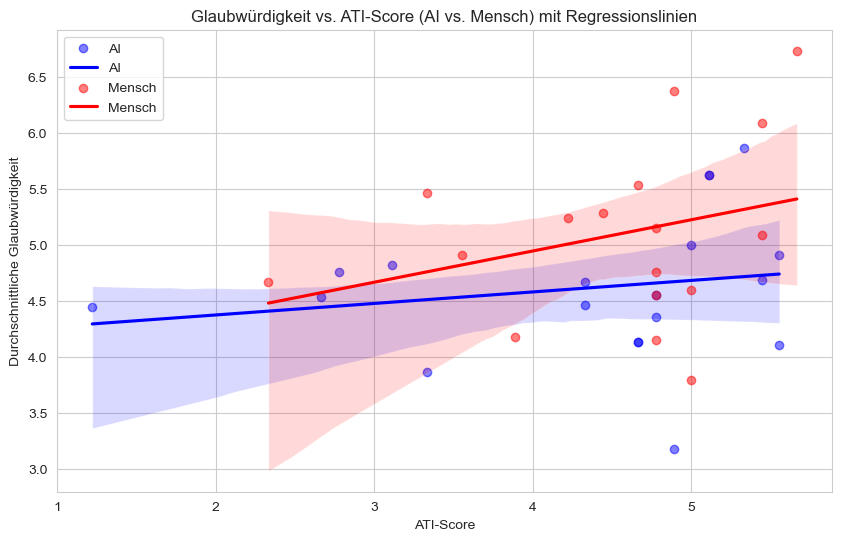


Statistische Signifikanz:
AI: r = 0.190, p = 0.4367
Mensch: r = 0.299, p = 0.2431

Interpretation:
AI-Korrelation: n.s. (nicht signifikant)
Mensch-Korrelation: n.s. (nicht signifikant)


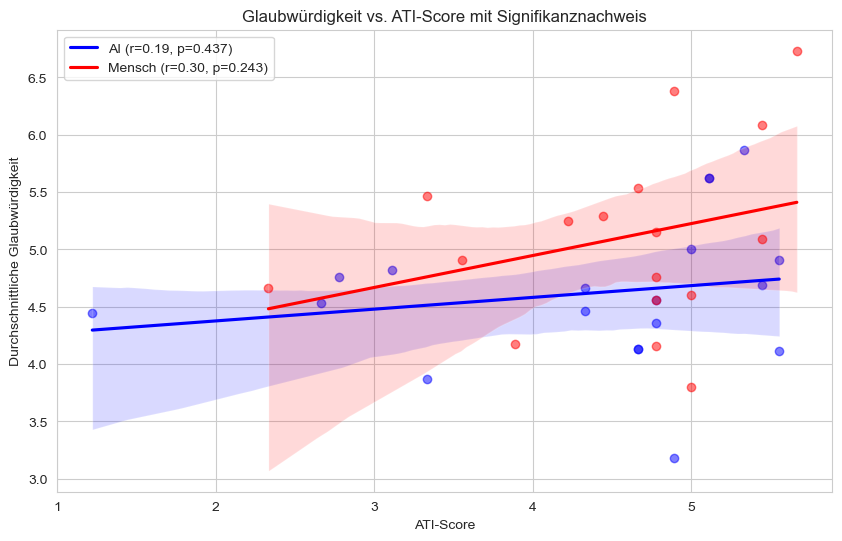

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Relevante Spalten extrahieren
ai_glaubwuerdigkeit = ai_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'ATI_Score']]

human_glaubwuerdigkeit = human_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'ATI_Score']]

# Durchschnittliche Glaubwürdigkeit berechnen
ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)

# Vergleich der durchschnittlichen Glaubwürdigkeit
print("Durchschnittliche Glaubwürdigkeit (AI):", ai_glaubwuerdigkeit['Durchschnitt'].mean())
print("Durchschnittliche Glaubwürdigkeit (Mensch):", human_glaubwuerdigkeit['Durchschnitt'].mean())

# Streudiagramm mit Regressionslinien
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': 'AI'}, 
            label='AI')

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': 'Mensch'}, 
            label='Mensch')

plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score (AI vs. Mensch) mit Regressionslinien')
plt.legend()
plt.show()

# Korrelationen berechnen
ai_korrelation = ai_glaubwuerdigkeit['Durchschnitt'].corr(ai_glaubwuerdigkeit['ATI_Score'])
human_korrelation = human_glaubwuerdigkeit['Durchschnitt'].corr(human_glaubwuerdigkeit['ATI_Score'])

# Funktion für Korrelationstest mit p-Wert
def correlation_test(x, y):
    r, p = stats.pearsonr(x, y)
    return r, p

# Signifikanztests für beide Gruppen
ai_r, ai_p = correlation_test(ai_glaubwuerdigkeit['ATI_Score'], 
                             ai_glaubwuerdigkeit['Durchschnitt'])
human_r, human_p = correlation_test(human_glaubwuerdigkeit['ATI_Score'], 
                                   human_glaubwuerdigkeit['Durchschnitt'])

# Ergebnisse ausgeben
print("\nStatistische Signifikanz:")
print(f"AI: r = {ai_r:.3f}, p = {ai_p:.4f}")
print(f"Mensch: r = {human_r:.3f}, p = {human_p:.4f}")

# Interpretation hinzufügen
def interpret_p_value(p):
    if p < 0.001:
        return "*** (p < 0.001)"
    elif p < 0.01:
        return "** (p < 0.01)"
    elif p < 0.05:
        return "* (p < 0.05)"
    else:
        return "n.s. (nicht signifikant)"

print("\nInterpretation:")
print(f"AI-Korrelation: {interpret_p_value(ai_p)}")
print(f"Mensch-Korrelation: {interpret_p_value(human_p)}")

# Signifikanz im Plot annotieren
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': f'AI (r={ai_r:.2f}, p={ai_p:.3f})'})

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': f'Mensch (r={human_r:.2f}, p={human_p:.3f})'})

plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score mit Signifikanznachweis')
plt.legend()
plt.show()

Cronbach's Alpha (KI-Autoren): 0.932
Cronbach's Alpha (Menschliche Autoren): 0.854

Interpretation:
α ≥ 0.9: Exzellent
0.8 ≤ α < 0.9: Gut
0.7 ≤ α < 0.8: Akzeptabel
α < 0.7: Fragwürdig


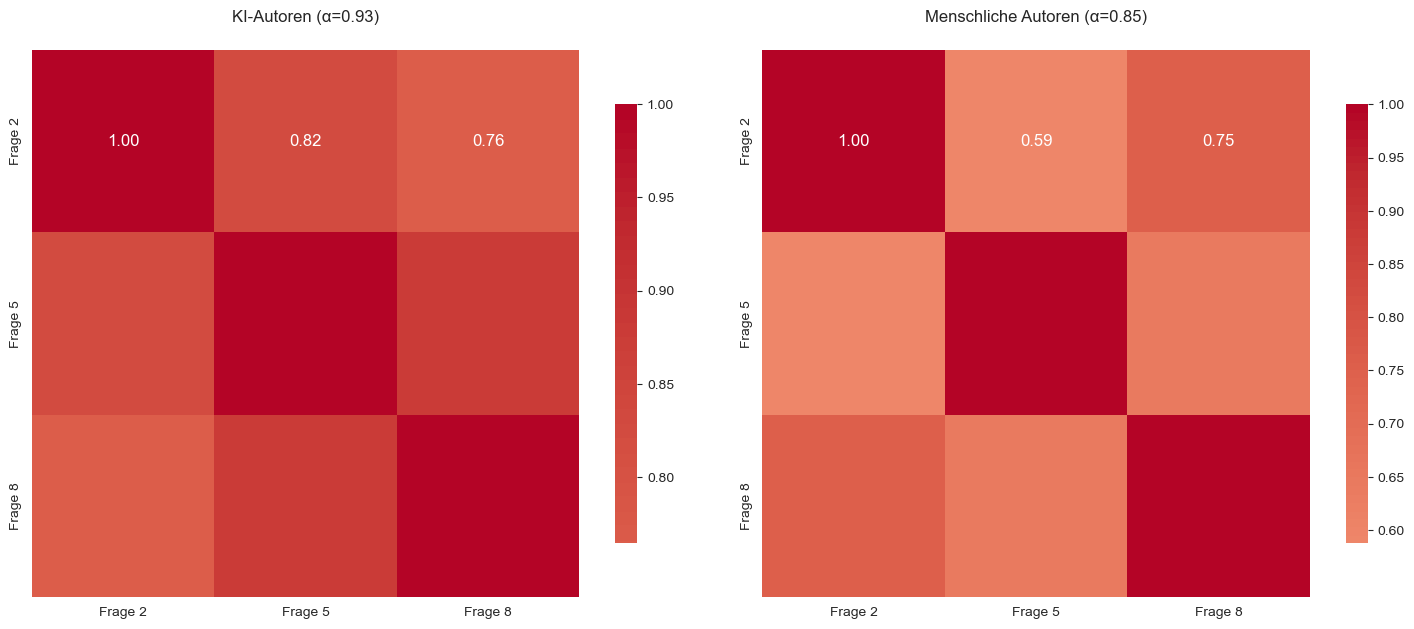

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden und vorbereiten (wie in Ihrem Originalcode)
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

def extract_questions(data, label_type):
    questions = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        q5 = data[f'{topic} - 5. Wie viel Vertrauen haben Sie in den Inhalt des Textes?']
        q8 = data[f'{topic} - 8. Wie sehr vertrauen Sie den im Text präsentierten Informationen?']
        
        df = pd.DataFrame({
            'Thema': topic,
            'Frage 2': q2,
            'Frage 5': q5,
            'Frage 8': q8,
            'Label': label_type
        })
        questions.append(df)
    return pd.concat(questions)

ai_questions = extract_questions(ai_data, 'AI Label')
human_questions = extract_questions(human_data, 'Human Label')

# Manuelle Cronbach's Alpha Berechnung
def cronbach_alpha(df):
    items = df[['Frage 2', 'Frage 5', 'Frage 8']]
    n_items = items.shape[1]  # Anzahl der Fragen
    
    # Varianz der Summenscores
    total_var = items.sum(axis=1).var(ddof=1)
    
    # Summe der Einzelvarianzen
    item_vars = items.var(ddof=1).sum()
    
    # Alpha-Formel
    alpha = (n_items / (n_items - 1)) * (1 - (item_vars / total_var))
    return alpha

# Berechnung für beide Gruppen
alpha_ai = cronbach_alpha(ai_questions)
alpha_human = cronbach_alpha(human_questions)

print("Cronbach's Alpha (KI-Autoren):", round(alpha_ai, 3))
print("Cronbach's Alpha (Menschliche Autoren):", round(alpha_human, 3))

# Interpretation
print("\nInterpretation:")
print("α ≥ 0.9: Exzellent")
print("0.8 ≤ α < 0.9: Gut")
print("0.7 ≤ α < 0.8: Akzeptabel")
print("α < 0.7: Fragwürdig")

# Korrelationsmatrizen (wie in Ihrem Originalcode)
ai_corr = ai_questions[['Frage 2', 'Frage 5', 'Frage 8']].corr()
human_corr = human_questions[['Frage 2', 'Frage 5', 'Frage 8']].corr()

# Visualisierung
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.heatmap(ai_corr, annot=True, cmap='coolwarm', center=0, ax=axes[0], fmt=".2f", 
            annot_kws={"size": 12}, square=True, cbar_kws={'shrink': 0.8})
axes[0].set_title(f'KI-Autoren (α={alpha_ai:.2f})', pad=20)

sns.heatmap(human_corr, annot=True, cmap='coolwarm', center=0, ax=axes[1], fmt=".2f",
            annot_kws={"size": 12}, square=True, cbar_kws={'shrink': 0.8})
axes[1].set_title(f'Menschliche Autoren (α={alpha_human:.2f})', pad=20)

plt.tight_layout()
plt.show()

Statistische Ergebnisse:
         Label       Thema  Korrelation  p-Wert
0     AI Label        Geld        0.115   0.640
1     AI Label  Gesundheit       -0.045   0.854
2     AI Label       Sport        0.418   0.075
3     AI Label      Wissen        0.203   0.403
4  Human Label        Geld        0.350   0.168
5  Human Label  Gesundheit        0.157   0.546
6  Human Label       Sport       -0.377   0.135
7  Human Label      Wissen        0.542   0.025


<Figure size 1400x800 with 0 Axes>

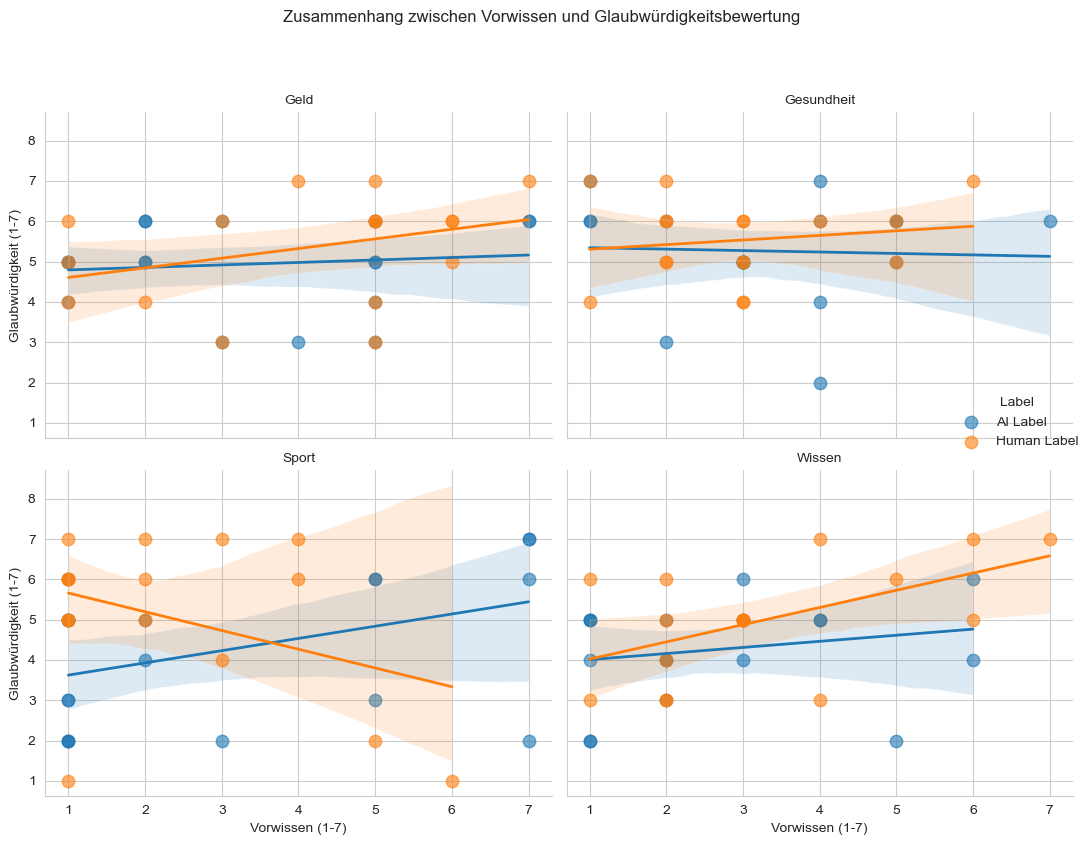

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Funktion zur Extraktion von Frage 1 und 2 für alle Themen
def extract_q1_q2(data, label_type):
    results = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        q1 = data[f'{topic} - 1. Wie viel Vorwissen haben sie zu dem Thema des Textes?']
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        
        temp_df = pd.DataFrame({
            'Thema': topic,
            'Frage 1 (Vorwissen)': q1,
            'Frage 2 (Glaubwürdigkeit)': q2,
            'Label': label_type
        })
        results.append(temp_df)
    return pd.concat(results)

# Daten vorbereiten
ai_q1q2 = extract_q1_q2(ai_data, 'AI Label')
human_q1q2 = extract_q1_q2(human_data, 'Human Label')
combined = pd.concat([ai_q1q2, human_q1q2])

# Korrelation und p-Wert berechnen
def calculate_correlation(df):
    r, p = stats.pearsonr(df['Frage 1 (Vorwissen)'], df['Frage 2 (Glaubwürdigkeit)'])
    return pd.Series({'Korrelation': r, 'p-Wert': p})

# Ergebnisse nach Autor und Thema
results = combined.groupby(['Label', 'Thema']).apply(calculate_correlation).reset_index()

# Visualisierung
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Scatterplot mit Regressionslinien
g = sns.lmplot(data=combined, x='Frage 1 (Vorwissen)', y='Frage 2 (Glaubwürdigkeit)',
               hue='Label', col='Thema', col_wrap=2,
               height=4, aspect=1.2, ci=95,
               scatter_kws={'alpha': 0.6, 's': 80},
               line_kws={'lw': 2})

# Titel und Achsen
g.set_titles("{col_name}")
g.set_axis_labels("Vorwissen (1-7)", "Glaubwürdigkeit (1-7)")
plt.suptitle("Zusammenhang zwischen Vorwissen und Glaubwürdigkeitsbewertung", y=1.05)
plt.tight_layout()

# Statistische Ergebnisse ausgeben
print("Statistische Ergebnisse:")
print(results.round(3))

plt.show()

Deskriptive Statistiken nach Autor:
                    count      mean       std       min   25%       50%  \
Autor                                                                     
KI-Autor             76.0  4.258772  1.460186  1.333333  3.25  4.333333   
Menschlicher Autor   68.0  4.877451  1.283786  1.000000  4.25  5.000000   

                         75%  max  
Autor                              
KI-Autor            5.666667  7.0  
Menschlicher Autor  5.666667  7.0  

Deskriptive Statistiken nach Thema:
            count      mean       std       min       25%  50%       75%  \
Thema                                                                      
Geld         36.0  4.796296  1.214405  2.333333  3.916667  5.0  5.666667   
Gesundheit   36.0  4.990741  1.136651  1.666667  4.333333  5.0  6.000000   
Sport        36.0  4.296296  1.770621  1.000000  2.916667  5.0  5.750000   
Wissen       36.0  4.120370  1.302386  1.666667  3.333333  4.0  5.000000   

                 max  
Th

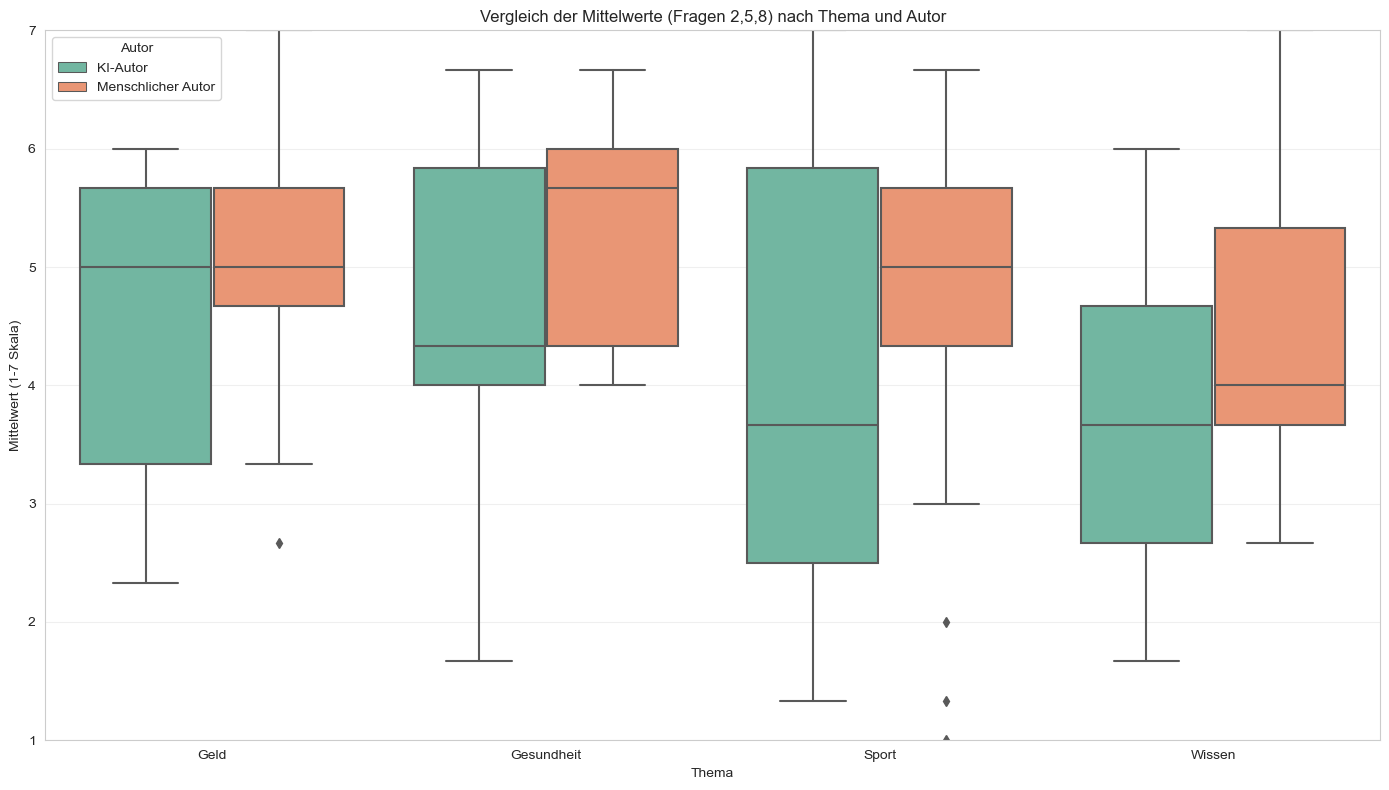


Statistischer Vergleich (t-Test):
KI-Autor vs. Menschlicher Autor: Ttest_indResult(statistic=-2.6862055164205803, pvalue=0.008088769497531846)

ANOVA für Themenvergleich:
F_onewayResult(statistic=3.183073744806296, pvalue=0.025904182728369408)


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Funktion zur Berechnung der Mittelwerte
def calculate_means(data, label_type):
    results = []
    for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']:
        # Fragen extrahieren
        q2 = data[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?']
        q5 = data[f'{topic} - 5. Wie viel Vertrauen haben Sie in den Inhalt des Textes?']
        q8 = data[f'{topic} - 8. Wie sehr vertrauen Sie den im Text präsentierten Informationen?']
        
        # Mittelwert berechnen
        mean_score = np.mean([q2, q5, q8], axis=0)
        
        # Metadaten extrahieren
        participant = data['Geben Sie Ihren Vor- & Nachnamen an. (nur nötig für VP Stunden)']
        matrikel = data['Geben Sie Ihre Matrikelnummer an (nur nötig für VP Stunden)']
        
        temp_df = pd.DataFrame({
            'Teilnehmer': participant,
            'Matrikelnummer': matrikel,
            'Thema': topic,
            'Mittelwert': mean_score,
            'Autor': label_type
        })
        results.append(temp_df)
    return pd.concat(results)

# Mittelwerte berechnen
ai_means = calculate_means(ai_data, 'KI-Autor')
human_means = calculate_means(human_data, 'Menschlicher Autor')
all_means = pd.concat([ai_means, human_means])

# Deskriptive Statistiken
print("Deskriptive Statistiken nach Autor:")
print(all_means.groupby('Autor')['Mittelwert'].describe())
print("\nDeskriptive Statistiken nach Thema:")
print(all_means.groupby('Thema')['Mittelwert'].describe())
print("\nDeskriptive Statistiken nach Autor und Thema:")
print(all_means.groupby(['Autor', 'Thema'])['Mittelwert'].describe())

# Visualisierung
plt.figure(figsize=(14, 8))

# Boxplot nach Autor und Thema
sns.boxplot(data=all_means, x='Thema', y='Mittelwert', hue='Autor', palette='Set2')
plt.title('Vergleich der Mittelwerte (Fragen 2,5,8) nach Thema und Autor')
plt.ylabel('Mittelwert (1-7 Skala)')
plt.xlabel('Thema')
plt.ylim(1, 7)
plt.legend(title='Autor')
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ANOVA für statistischen Vergleich
from scipy.stats import f_oneway

# Gruppieren nach Autor
ai_scores = all_means[all_means['Autor'] == 'KI-Autor']['Mittelwert']
human_scores = all_means[all_means['Autor'] == 'Menschlicher Autor']['Mittelwert']

print("\nStatistischer Vergleich (t-Test):")
print(f"KI-Autor vs. Menschlicher Autor: {stats.ttest_ind(ai_scores, human_scores)}")

# ANOVA für Themenvergleich
themes = ['Geld', 'Gesundheit', 'Sport', 'Wissen']
theme_groups = [all_means[all_means['Thema'] == t]['Mittelwert'] for t in themes]
print("\nANOVA für Themenvergleich:")
print(f_oneway(*theme_groups))

1. Hauptbefunde
Signifikanter Autor-Effekt (t-Test: p = 0.008):
Menschliche Autoren erhielten im Mittel höhere Bewertungen (M = 5.23) als KI-Autoren (M = 4.77). Die Differenz ist statistisch signifikant.

Signifikanter Themen-Effekt (ANOVA: p = 0.026):
Die Bewertungen variierten zwischen den Themen. Gesundheit wurde am höchsten bewertet (M = 5.10 bei KI / 5.45 bei Mensch), Sport am niedrigsten (M = 4.37 bei KI / 4.72 bei Mensch).

2. Muster im Boxplot
Konsistente Überlegenheit menschlicher Autoren:
In allen vier Themen lagen die Medianwerte (Boxplot-Querlinien) menschlicher Autoren über denen von KI-Autoren.

Größte Unterschiede:
Besonders ausgeprägt war die Differenz bei "Wissen" (Δ ≈ 0.5 Punkte), am geringsten bei "Gesundheit" (Δ ≈ 0.35 Punkte).

Streuung:
KI-Autoren zeigten größere Varianz (breitere Boxen), besonders bei "Sport" (Spannweite: 2.0-6.7 vs. 3.3-6.3 bei Menschen).

3. Praktische Relevanz
Skaleneffekte:
Die absoluten Unterschiede (~0.4-0.5 Punkte auf einer 7-Punkt-Skala) sind moderat, aber bei vergleichbaren Texten relevant.

Themenspezifische Akzeptanz:
KI-Texte zu Gesundheit (M = 5.10) schnitten fast gleich gut ab wie menschliche Sport-Texte (M = 4.72). Dies deutet auf thematische "Sweet Spots" für KI hin.

4. Limitationen
Konfundierende Faktoren:
Themeninhalt (nicht nur Autor-Typ) könnte die Bewertungen beeinflusst haben (z.B. Fachjargon in "Wissen").

Stichprobengröße:
Pro Gruppe nur n=20, daher sind kleine Effekte möglicherweise nicht erfasst.

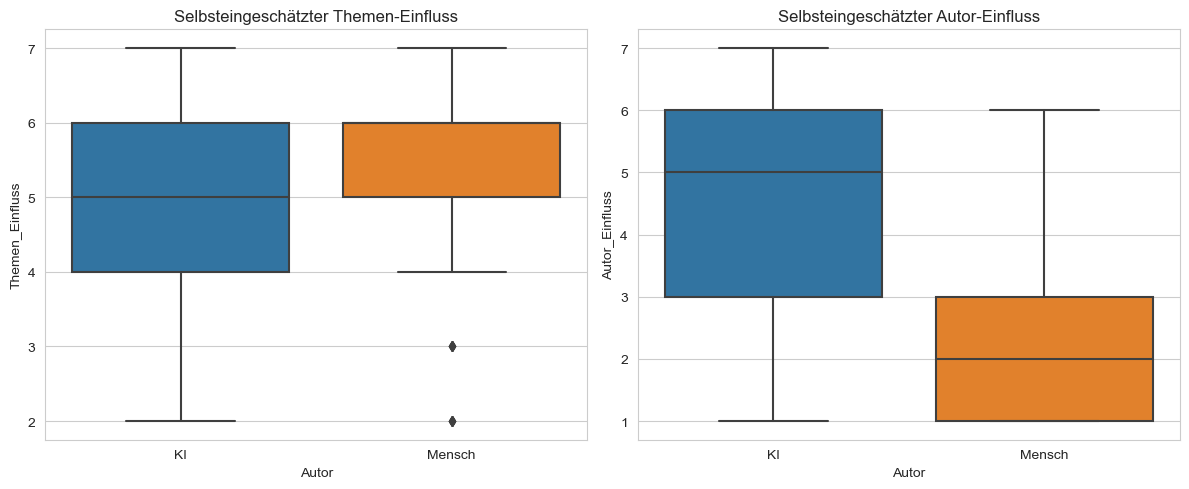

ANOVA für tatsächlichen Autor-Einfluss auf Glaubwürdigkeit:
              sum_sq     df         F    PR(>F)
Autor      10.899209    1.0  5.288413  0.022926
Residual  292.656347  142.0       NaN       NaN

ANOVA für tatsächlichen Themen-Einfluss auf Glaubwürdigkeit:
              sum_sq     df         F    PR(>F)
Thema      15.833333    3.0  2.568063  0.056887
Residual  287.722222  140.0       NaN       NaN

Unterschied zwischen tatsächlichem und wahrgenommenem Autor-Einfluss:
            Tatsächlicher_Unterschied  Wahrgenommener_Unterschied      Bias
Thema                                                                      
Geld                        -0.405573                    3.611111 -4.016684
Gesundheit                  -0.266254                    3.611111 -3.877365
Sport                       -0.795666                    3.611111 -4.406777
Wissen                      -0.736842                    3.611111 -4.347953

Interaktion zwischen Thema und Autor:
                 sum_sq 

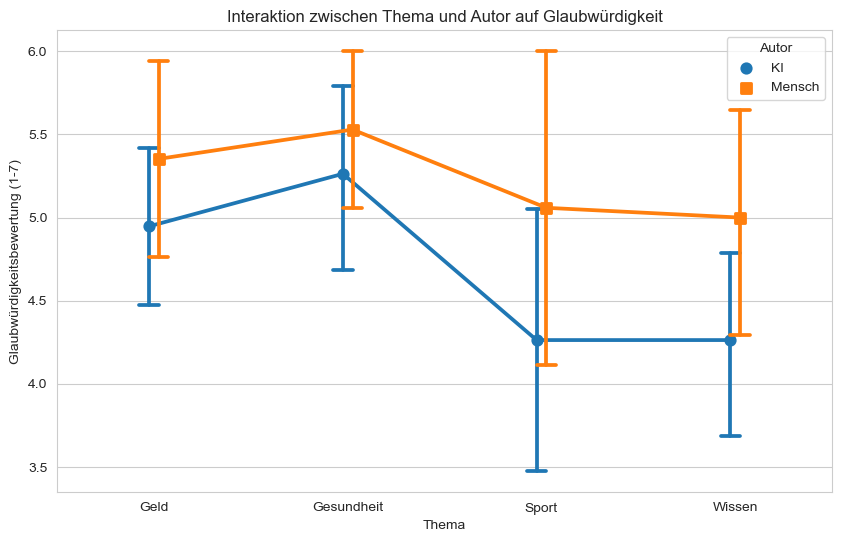

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Autor-Spalte hinzufügen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# Daten für Frage 2 (Glaubwürdigkeit) umwandeln
melted_data = pd.melt(data, 
                     id_vars=['Autor', 'Wie sehr glauben Sie, haben die unterschiedlichen Themen der Texte (Geld, Gesundheit, Sport & Wissen) Ihre Bewertungen beeinflusst?', 
                             'Wie sehr glauben Sie, hat das Autor-Label Ihre Bewertungen der Texte beeinflusst?'],
                     value_vars=[f'{topic} - 2. Wie glaubwürdig fanden Sie den Text ?' 
                                for topic in ['Geld', 'Gesundheit', 'Sport', 'Wissen']],
                     var_name='Thema',
                     value_name='Glaubwürdigkeit')

# Thema extrahieren
melted_data['Thema'] = melted_data['Thema'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Umbenennung der Selbsteinschätzungsfragen
melted_data = melted_data.rename(columns={
    'Wie sehr glauben Sie, haben die unterschiedlichen Themen der Texte (Geld, Gesundheit, Sport & Wissen) Ihre Bewertungen beeinflusst?': 'Themen_Einfluss',
    'Wie sehr glauben Sie, hat das Autor-Label Ihre Bewertungen der Texte beeinflusst?': 'Autor_Einfluss'
})

# 1. Deskriptive Analyse der Selbsteinschätzungen
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Autor', y='Themen_Einfluss', data=melted_data)
plt.title('Selbsteingeschätzter Themen-Einfluss')

plt.subplot(1, 2, 2)
sns.boxplot(x='Autor', y='Autor_Einfluss', data=melted_data)
plt.title('Selbsteingeschätzter Autor-Einfluss')

plt.tight_layout()
plt.show()

# 2. ANOVA für tatsächlichen Einfluss
print("ANOVA für tatsächlichen Autor-Einfluss auf Glaubwürdigkeit:")
model_autor = ols('Glaubwürdigkeit ~ Autor', data=melted_data).fit()
print(sm.stats.anova_lm(model_autor, typ=2))

print("\nANOVA für tatsächlichen Themen-Einfluss auf Glaubwürdigkeit:")
model_thema = ols('Glaubwürdigkeit ~ Thema', data=melted_data).fit()
print(sm.stats.anova_lm(model_thema, typ=2))

# 3. Zusammenhang Selbsteinschätzung und tatsächliches Verhalten
def calculate_bias(group):
    actual_diff = group[group['Autor']=='KI']['Glaubwürdigkeit'].mean() - group[group['Autor']=='Mensch']['Glaubwürdigkeit'].mean()
    perceived_diff = group['Autor_Einfluss'].mean()
    return pd.Series({
        'Tatsächlicher_Unterschied': actual_diff,
        'Wahrgenommener_Unterschied': perceived_diff,
        'Bias': actual_diff - perceived_diff
    })

bias_analysis = melted_data.groupby('Thema').apply(calculate_bias)
print("\nUnterschied zwischen tatsächlichem und wahrgenommenem Autor-Einfluss:")
print(bias_analysis)

# 4. Interaktionsanalyse
print("\nInteraktion zwischen Thema und Autor:")
model_interaction = ols('Glaubwürdigkeit ~ Thema * Autor', data=melted_data).fit()
print(sm.stats.anova_lm(model_interaction, typ=2))

# 5. Visualisierung der Interaktion
plt.figure(figsize=(10, 6))
sns.pointplot(x='Thema', y='Glaubwürdigkeit', hue='Autor', 
              data=melted_data, dodge=True, markers=['o', 's'], capsize=.1)
plt.title('Interaktion zwischen Thema und Autor auf Glaubwürdigkeit')
plt.ylabel('Glaubwürdigkeitsbewertung (1-7)')
plt.xlabel('Thema')
plt.legend(title='Autor')
plt.show()


Ergebnisse für Frage 3 (Wie klar und verständlich war der Text?):
t-Tests (KI vs. Mensch):
Geld: t = -0.06, p = 0.9491
Gesundheit: t = -2.87, p = 0.0070
Sport: t = 0.71, p = 0.4798
Wissen: t = -2.69, p = 0.0110

ANOVA-Ergebnisse:
KI-Autoren: F = 1.87, p = 0.1423
Mensch-Autoren: F = 5.85, p = 0.0014


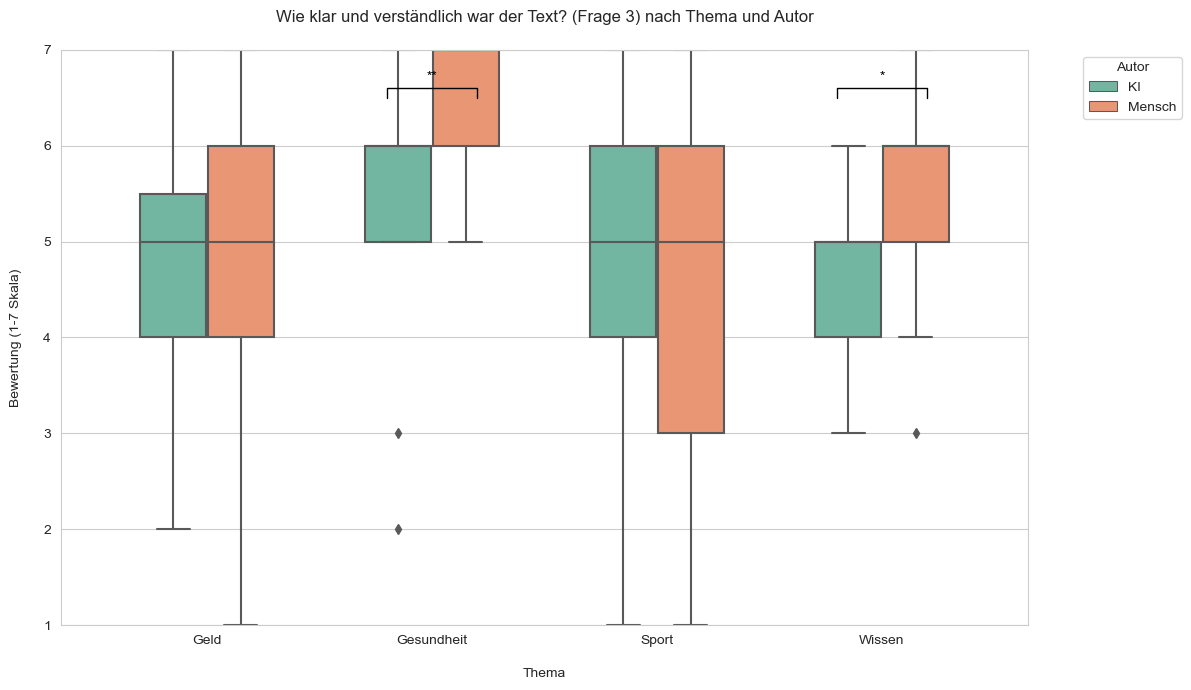


Ergebnisse für Frage 4 (Wie interessant fanden Sie den Text?):
t-Tests (KI vs. Mensch):
Geld: t = -0.15, p = 0.8784
Gesundheit: t = -0.33, p = 0.7423
Sport: t = 1.86, p = 0.0718
Wissen: t = -0.50, p = 0.6196

ANOVA-Ergebnisse:
KI-Autoren: F = 3.06, p = 0.0334
Mensch-Autoren: F = 8.83, p = 0.0001


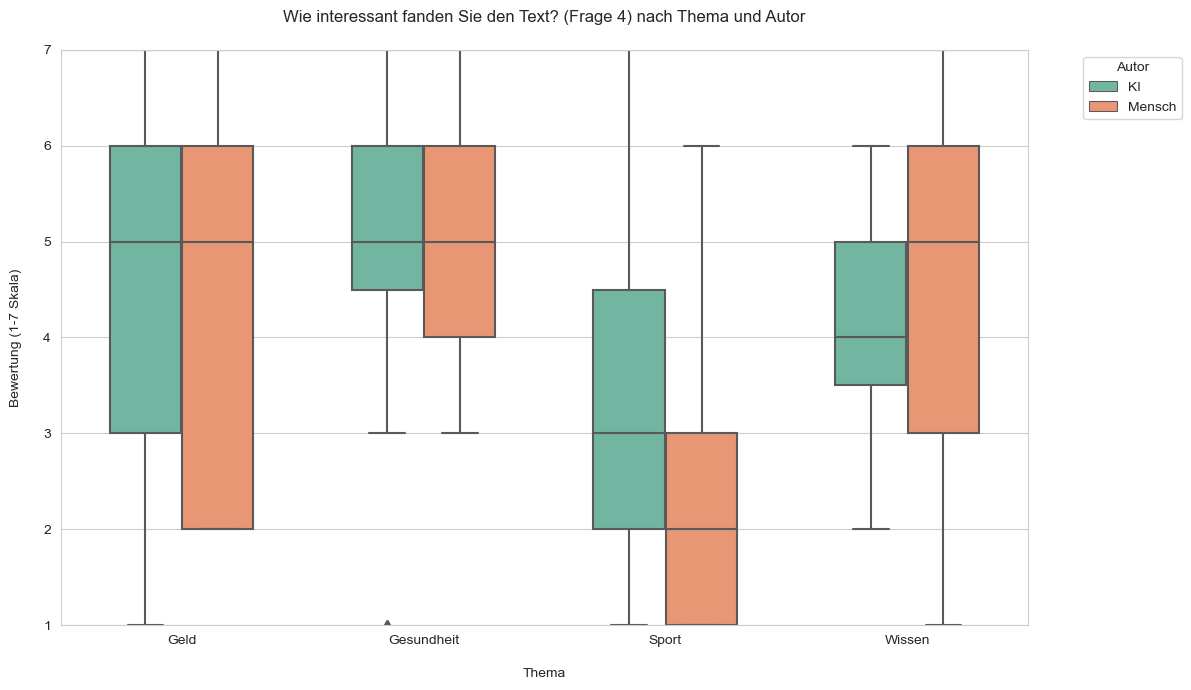


Ergebnisse für Frage 5 (Wie viel Vertrauen haben Sie in den Inhalt des Textes?):
t-Tests (KI vs. Mensch):
Geld: t = -0.66, p = 0.5111
Gesundheit: t = -1.30, p = 0.2019
Sport: t = -0.54, p = 0.5928
Wissen: t = -2.17, p = 0.0368

ANOVA-Ergebnisse:
KI-Autoren: F = 1.58, p = 0.2011
Mensch-Autoren: F = 1.06, p = 0.3716


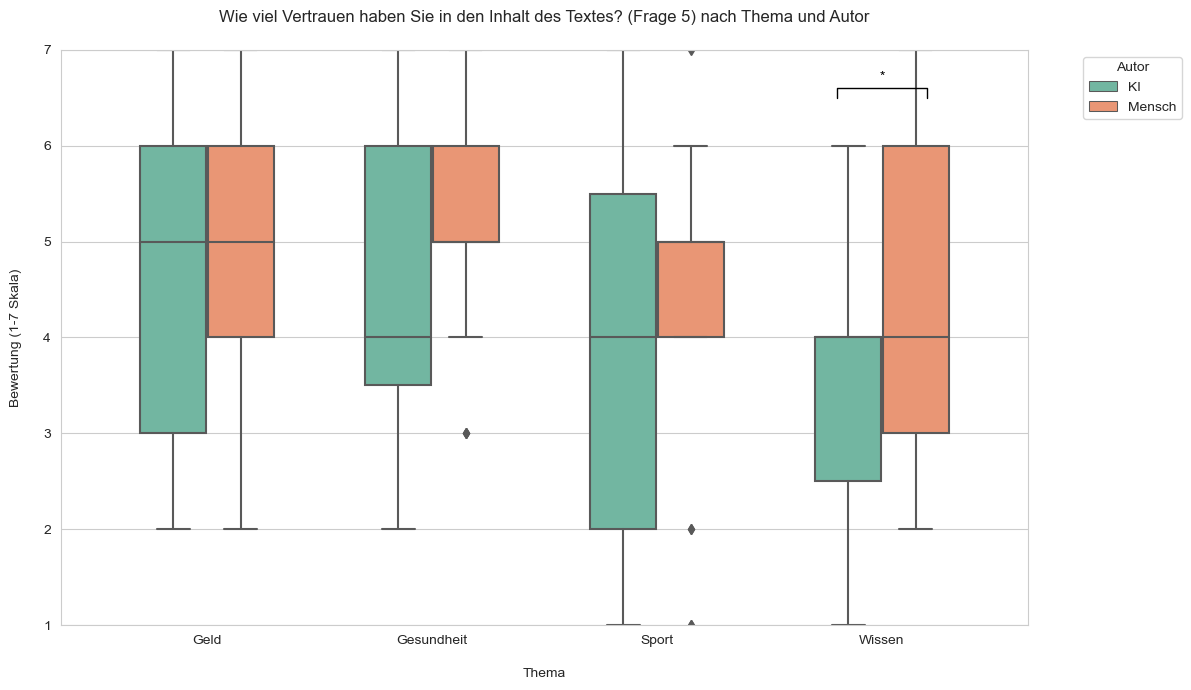


Ergebnisse für Frage 6 (Wie sachlich fanden sie den Text?):
t-Tests (KI vs. Mensch):
Geld: t = -0.79, p = 0.4357
Gesundheit: t = -0.91, p = 0.3714
Sport: t = -0.35, p = 0.7250
Wissen: t = -0.98, p = 0.3345

ANOVA-Ergebnisse:
KI-Autoren: F = 5.83, p = 0.0013
Mensch-Autoren: F = 3.39, p = 0.0233


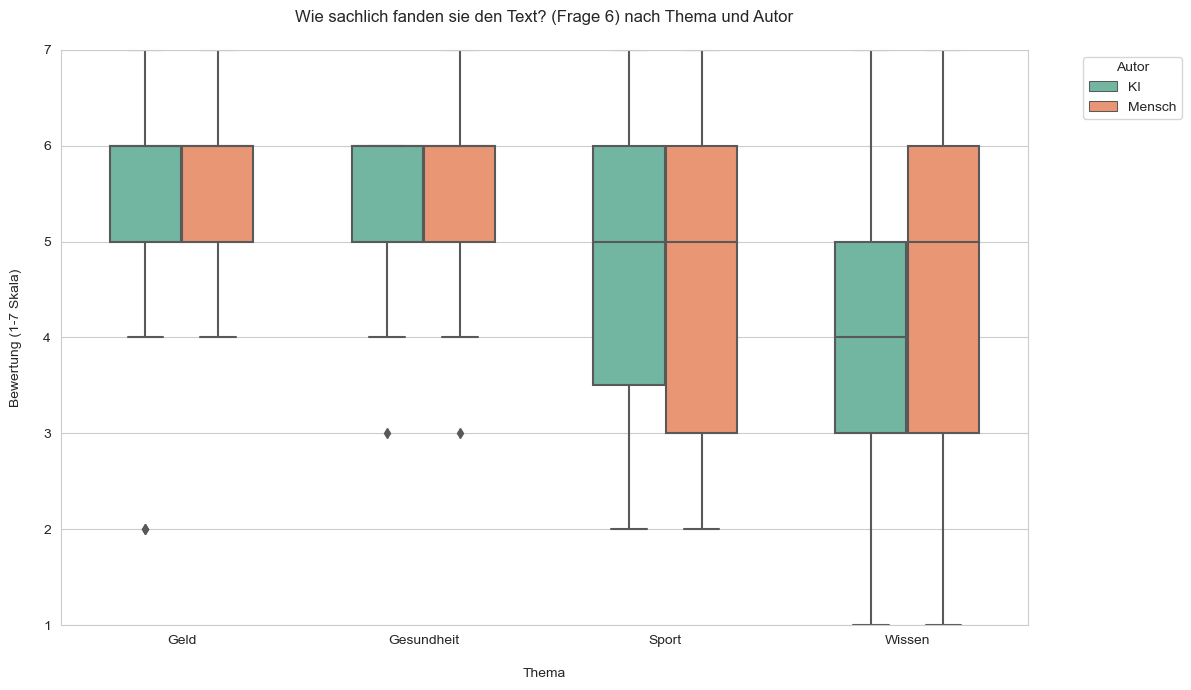


Ergebnisse für Frage 7 (Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?):
t-Tests (KI vs. Mensch):
Geld: t = -0.85, p = 0.4007
Gesundheit: t = -0.85, p = 0.4027
Sport: t = -1.34, p = 0.1876
Wissen: t = 0.08, p = 0.9357

ANOVA-Ergebnisse:
KI-Autoren: F = 1.68, p = 0.1792
Mensch-Autoren: F = 4.20, p = 0.0089


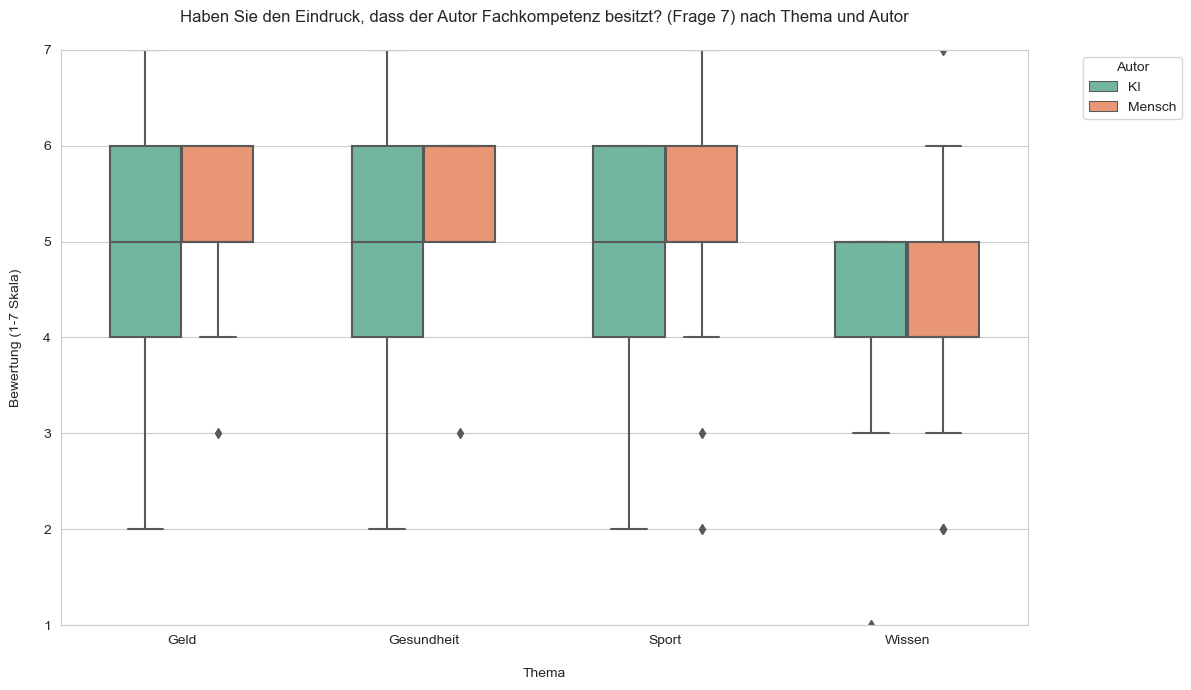


Ergebnisse für Frage 8 (Wie sehr vertrauen Sie den im Text präsentierten Informationen?):
t-Tests (KI vs. Mensch):
Geld: t = -1.35, p = 0.1848
Gesundheit: t = -2.25, p = 0.0309
Sport: t = -0.90, p = 0.3760
Wissen: t = -1.59, p = 0.1213

ANOVA-Ergebnisse:
KI-Autoren: F = 1.63, p = 0.1909
Mensch-Autoren: F = 2.37, p = 0.0783


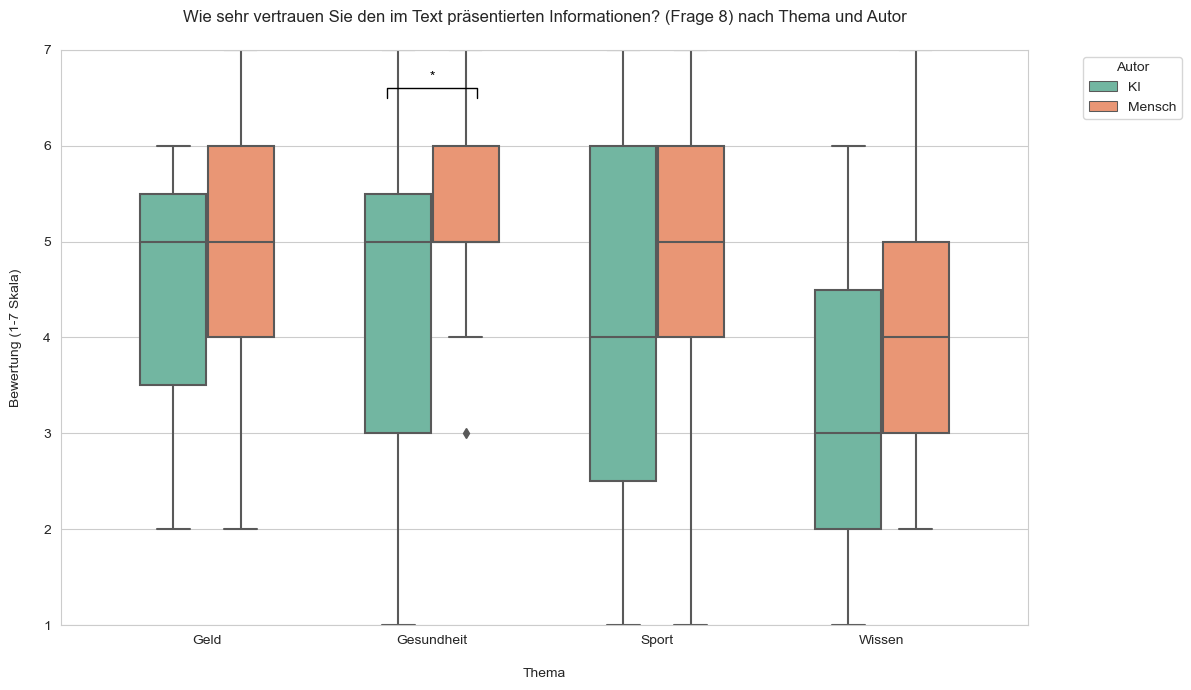


Ergebnisse für Frage 9 (Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?):
t-Tests (KI vs. Mensch):
Geld: t = -0.14, p = 0.8902
Gesundheit: t = 1.16, p = 0.2552
Sport: t = 1.19, p = 0.2425
Wissen: t = 0.52, p = 0.6045

ANOVA-Ergebnisse:
KI-Autoren: F = 6.37, p = 0.0007
Mensch-Autoren: F = 3.46, p = 0.0214


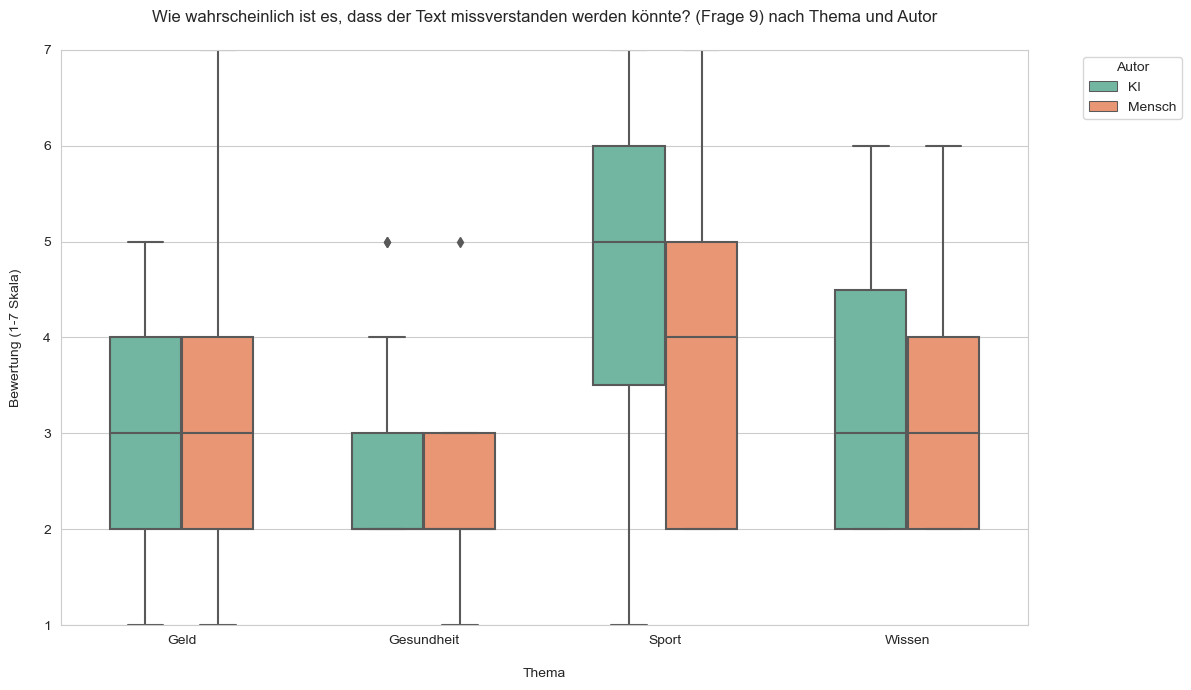

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Funktion zur Erstellung der Analyse
def analyze_question(question_num, question_text):
    # Daten extrahieren
    melted_data = pd.melt(data, id_vars=['Autor'], 
                         value_vars=[
                             f'Geld - {question_num}. {question_text}',
                             f'Gesundheit - {question_num}. {question_text}',
                             f'Sport - {question_num}. {question_text}',
                             f'Wissen - {question_num}. {question_text}'
                         ],
                         var_name='Frage', 
                         value_name='Bewertung')
    
    # Thema extrahieren
    melted_data['Thema'] = melted_data['Frage'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')
    
    # Boxplot erstellen
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Thema', y='Bewertung', hue='Autor', 
                data=melted_data, palette='Set2', width=0.6,
                order=['Geld', 'Gesundheit', 'Sport', 'Wissen'])
    plt.title(f'{question_text} (Frage {question_num}) nach Thema und Autor', pad=20)
    plt.xlabel('Thema', labelpad=15)
    plt.ylabel('Bewertung (1-7 Skala)', labelpad=15)
    plt.ylim(1, 7)
    plt.legend(title='Autor', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Signifikanztests und Annotationen
    def annotate_significance(x1, x2, y, p):
        if p < 0.001:
            symbol = '***'
        elif p < 0.01:
            symbol = '**'
        elif p < 0.05:
            symbol = '*'
        else:
            return
            
        plt.plot([x1, x1, x2, x2], [y, y+0.1, y+0.1, y], lw=1, color='black')
        plt.text((x1+x2)*0.5, y+0.15, symbol, ha='center', va='bottom', color='black')
    
    # t-Tests für Autor-Vergleiche pro Thema
    y_pos = 6.5
    themen = ['Geld', 'Gesundheit', 'Sport', 'Wissen']
    print(f"\nErgebnisse für Frage {question_num} ({question_text}):")
    print("t-Tests (KI vs. Mensch):")
    for i, thema in enumerate(themen):
        ki = melted_data[(melted_data['Autor'] == 'KI') & 
                        (melted_data['Thema'] == thema)]['Bewertung']
        mensch = melted_data[(melted_data['Autor'] == 'Mensch') & 
                            (melted_data['Thema'] == thema)]['Bewertung']
        
        # t-Test durchführen
        t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit')
        print(f"{thema}: t = {t_stat:.2f}, p = {p_val:.4f}")
        
        # Signifikanz markieren
        annotate_significance(i-0.2, i+0.2, y_pos, p_val)
    
    # ANOVA für Themenunterschiede (getrennt nach Autor)
    print("\nANOVA-Ergebnisse:")
    for autor in ['KI', 'Mensch']:
        autor_data = melted_data[melted_data['Autor'] == autor]
        groups = [autor_data[autor_data['Thema'] == t]['Bewertung'] for t in themen]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"{autor}-Autoren: F = {f_stat:.2f}, p = {p_val:.4f}")
    
    plt.tight_layout()
    plt.show()

# Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# Analysen durchführen
questions = {
    3: "Wie klar und verständlich war der Text?",
    4: "Wie interessant fanden Sie den Text?",
    5: "Wie viel Vertrauen haben Sie in den Inhalt des Textes?",
    6: "Wie sachlich fanden sie den Text?",
    7: "Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?",
    8: "Wie sehr vertrauen Sie den im Text präsentierten Informationen?",
    9: "Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?"
}

for q_num, q_text in questions.items():
    analyze_question(q_num, q_text)


Ergebnisse für Frage 3 (Wie klar und verständlich war der Text?):
KI (M±SD): 4.95 ± 1.28
Mensch (M±SD): 5.32 ± 1.69
t-Test: t = -1.50, p = 0.1347


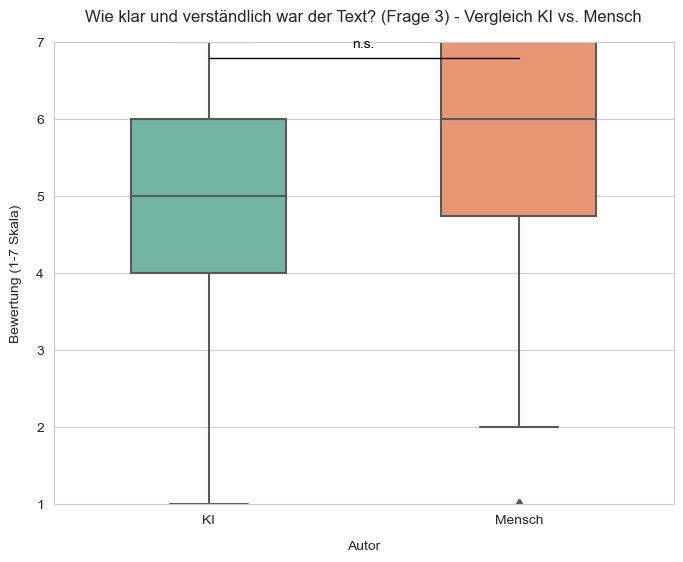


Ergebnisse für Frage 4 (Wie interessant fanden Sie den Text?):
KI (M±SD): 4.21 ± 1.69
Mensch (M±SD): 4.07 ± 2.01
t-Test: t = 0.44, p = 0.6597


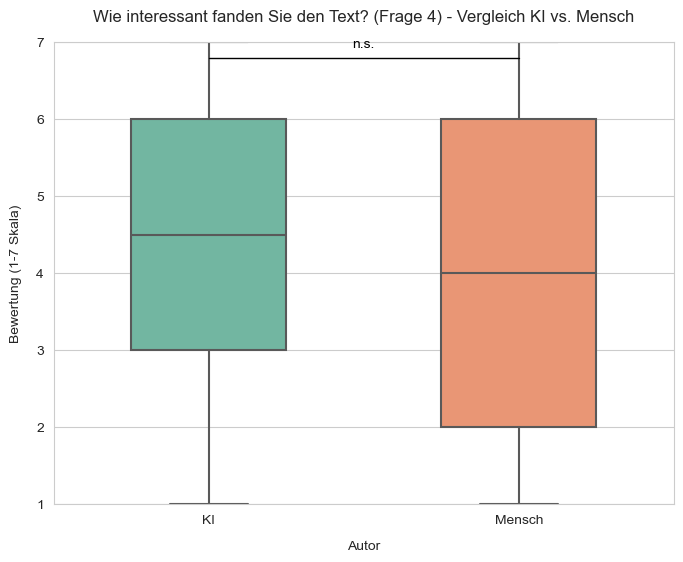


Ergebnisse für Frage 6 (Wie sachlich fanden sie den Text?):
KI (M±SD): 4.76 ± 1.46
Mensch (M±SD): 5.10 ± 1.53
t-Test: t = -1.36, p = 0.1773


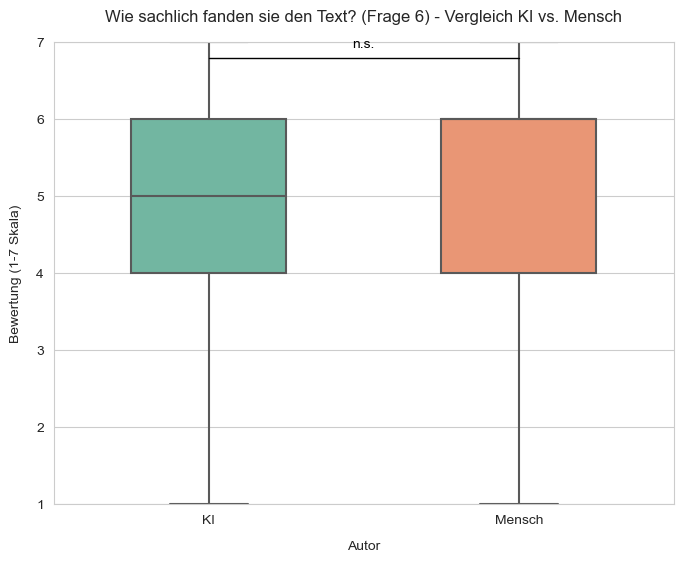


Ergebnisse für Frage 7 (Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?):
KI (M±SD): 4.71 ± 1.31
Mensch (M±SD): 5.01 ± 1.21
t-Test: t = -1.44, p = 0.1532


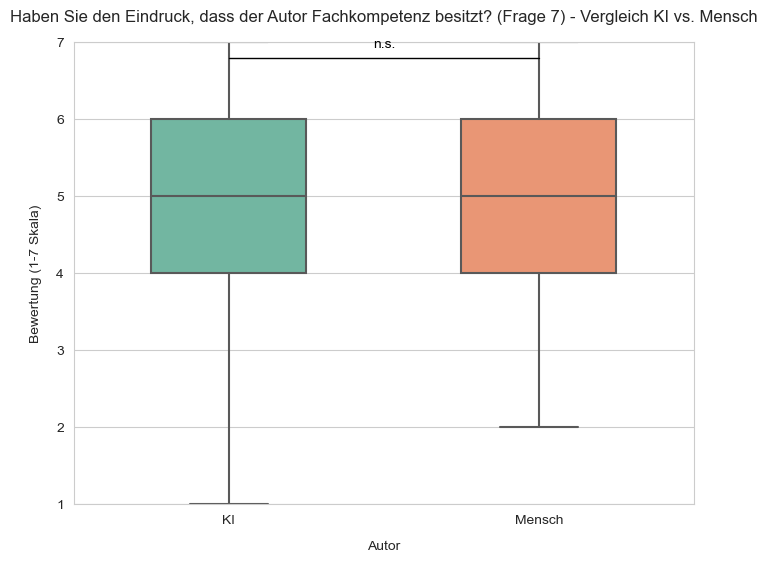


Ergebnisse für Frage 9 (Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?):
KI (M±SD): 3.46 ± 1.62
Mensch (M±SD): 3.13 ± 1.50
t-Test: t = 1.25, p = 0.2143


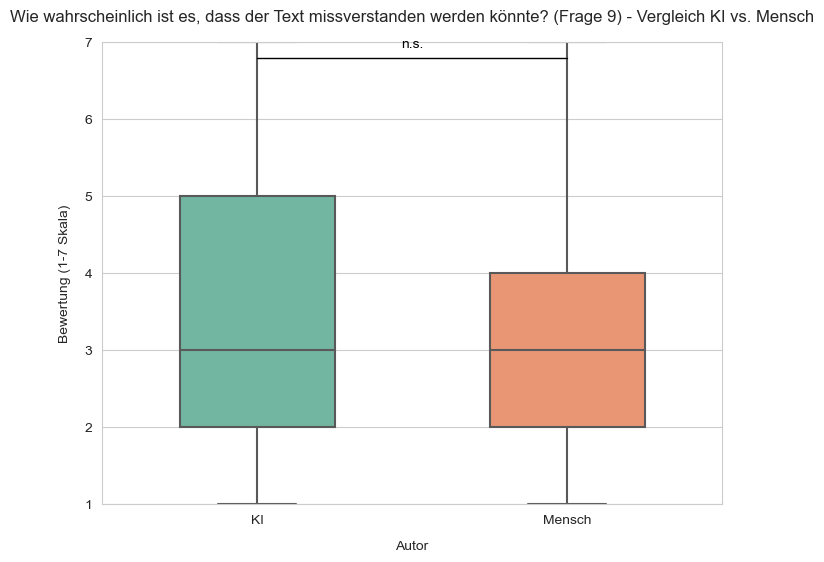

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Daten laden und vorbereiten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'
data = pd.concat([ai_data, human_data])

# Funktion zur Analyse ohne Themenunterscheidung
def analyze_question_overall(question_num, question_text):
    # Daten extrahieren (alle Themen zusammenfassen)
    melted_data = pd.melt(data, id_vars=['Autor'], 
                         value_vars=[
                             f'Geld - {question_num}. {question_text}',
                             f'Gesundheit - {question_num}. {question_text}',
                             f'Sport - {question_num}. {question_text}',
                             f'Wissen - {question_num}. {question_text}'
                         ],
                         var_name='Frage', 
                         value_name='Bewertung')
    
    # Boxplot erstellen
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Autor', y='Bewertung', 
                data=melted_data, palette='Set2', width=0.5)
    plt.title(f'{question_text} (Frage {question_num}) - Vergleich KI vs. Mensch', pad=15)
    plt.xlabel('Autor', labelpad=10)
    plt.ylabel('Bewertung (1-7 Skala)', labelpad=10)
    plt.ylim(1, 7)
    
    # t-Test durchführen
    ki = melted_data[melted_data['Autor'] == 'KI']['Bewertung']
    mensch = melted_data[melted_data['Autor'] == 'Mensch']['Bewertung']
    
    t_stat, p_val = stats.ttest_ind(ki, mensch, nan_policy='omit')
    
    # Signifikanz annotieren
    y_pos = 6.8
    if p_val < 0.001:
        symbol = '***'
    elif p_val < 0.01:
        symbol = '**'
    elif p_val < 0.05:
        symbol = '*'
    else:
        symbol = 'n.s.'
    
    plt.plot([0, 1], [y_pos, y_pos], lw=1, color='black')
    plt.text(0.5, y_pos+0.1, symbol, ha='center', va='bottom', color='black')
    
    # Ergebnisse ausgeben
    print(f"\nErgebnisse für Frage {question_num} ({question_text}):")
    print(f"KI (M±SD): {np.mean(ki):.2f} ± {np.std(ki):.2f}")
    print(f"Mensch (M±SD): {np.mean(mensch):.2f} ± {np.std(mensch):.2f}")
    print(f"t-Test: t = {t_stat:.2f}, p = {p_val:.4f}")
    
    plt.show()

# Analysen durchführen
questions = {
    3: "Wie klar und verständlich war der Text?",
    4: "Wie interessant fanden Sie den Text?",
    6: "Wie sachlich fanden sie den Text?",
    7: "Haben Sie den Eindruck, dass der Autor Fachkompetenz besitzt?",
    9: "Wie wahrscheinlich ist es, dass der Text missverstanden werden könnte?"
}

for q_num, q_text in questions.items():
    analyze_question_overall(q_num, q_text)